In [3]:
# Lasso -> L1 regularization (rectilinear distance)
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection as modsel
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [9]:
print("boston data shape : ",boston.data.shape)
print("boston target shape : ",boston.target.shape)

boston data shape :  (506, 13)
boston target shape :  (506,)


In [13]:
# defining the model object
lasso = linear_model.Lasso()

In [15]:
# training and testing data splitting
x_train, x_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size = 0.1, random_state = 42)

In [17]:
# training on data
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
metrics.mean_squared_error(y_train, lasso.predict(x_train))
# 22.739484154236614 with linear regression

27.609577768890034

In [21]:
lasso.score(x_train, y_train)
# 0.73749340919011974 for linear regression

0.6812726232199398

In [23]:
# testing the model
y_pred = lasso.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)
# 15.010997321630166 for linear regression

18.660542345877914

Performance graph


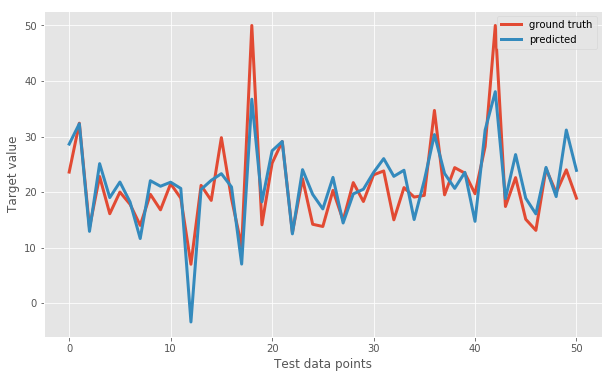

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(y_test, linewidth = 3, label = "ground truth")
plt.plot(y_pred, linewidth = 3, label = "predicted")
plt.legend(loc = "best")
plt.xlabel("Test data points")
plt.ylabel("Target value")
print("Performance graph")

estimation graph


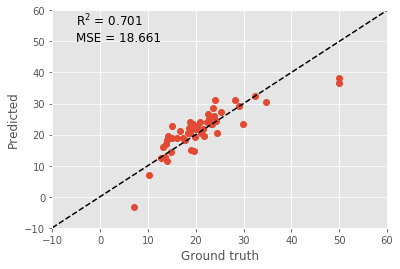

In [46]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('Ground truth')
plt.ylabel('Predicted')
score = 'R$^2$ = %.3f' %lasso.score(x_test, y_test)
error = 'MSE = %.3f' %metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 55, score, size = 12)
plt.text(-5, 50, error, size = 12)
print("estimation graph")